In [46]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from IPython.display import display, Image

import math
import operator
import pandas as pd
import numpy as np
from numpy.random import choice, randint
from scipy.spatial.distance import pdist, cdist, squareform

np.random.seed(2018)

def sig(x):
    return 1.0 / (1.0 + np.exp(-x))

## Problem 1.1

*Universal Approximation Theorem states that a single-layer neural network
(NN) can be used to approximate any continuous function within certain precision.
For any function with one input x and one output f(x), one way to
approximate it is to construct several ”bumps” as shown in Fig. 1a.*

### (a)
*Assuming sigmoid activation function is used, design a single layer NN with one input and one output to approximate the bump function shown in Fig. 1b. An example of a reasonable approximation using a single layer NN is show in in Fig. 1c. Try to replicate it as closely as possible. *

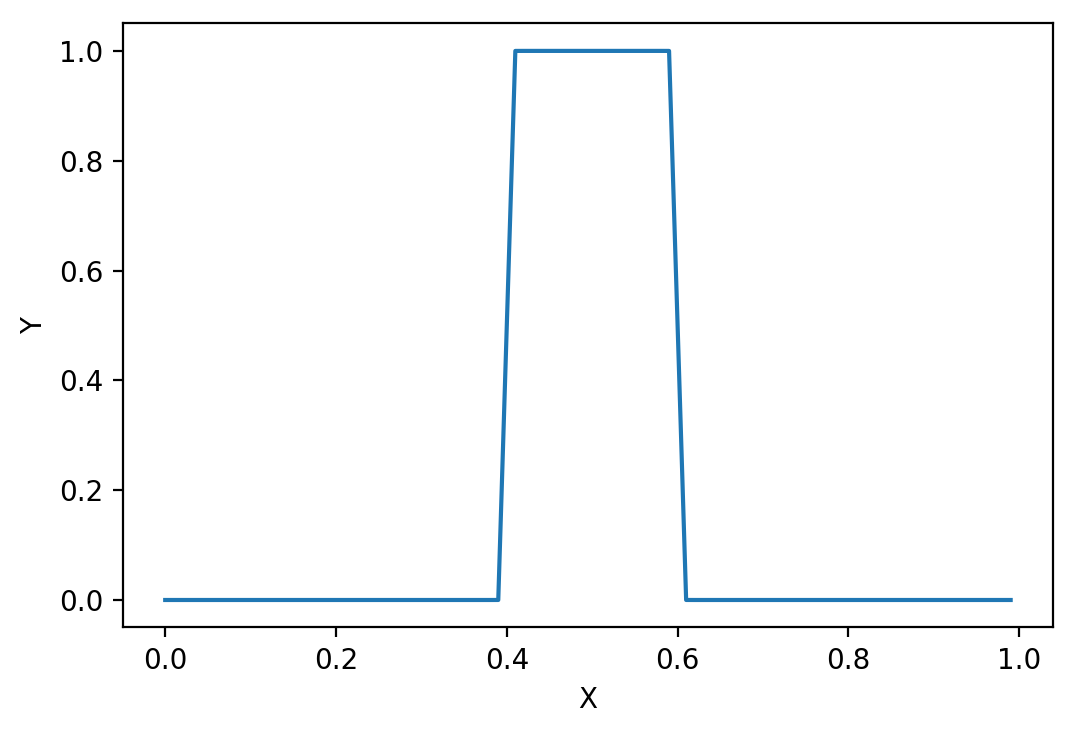

In [47]:
## ARCHITECTURE: (1) --> (2) --> (1)

step = 0.01

def bump2D(x):

    w1, w2 = 1000, -1000 # Weights
    b1, b2 = 0.4, 0.6 # Bias
    
    hidden1 = sig( (x - b1)*w1 )
    hidden2 = sig( (x - b2)*w2 )
        
    a1, a2 = 1.0, 1.0 # Weights
    c1, c2 = 0.5, 0.5 # Bias
    
    output = np.dot([hidden1 - c1, hidden2 - c2],[a1, a2])
    
    return output
    

X = np.arange(0,1,step)
Y = map(bump2D, X)

fig = plt.figure(figsize=(6,4), dpi=200)
plt.plot(X, Y)
plt.xlabel('X'); plt.ylabel('Y')

### (b)

The magnitude of the weights parameters $w_1,w_2$ determine the steepness of the step-up and step-down of the bump. The coordinates of the steps are determined by the corresponding bias parameters $b_1,b_2$. The height of the bump can be controlled by value of the output weights $a_1,a_2$.

## Problem 1.2

sig (100, 3) * (3, 2) = (100, 2)
lin (100, 2) * (2, 2) = (100, 2)


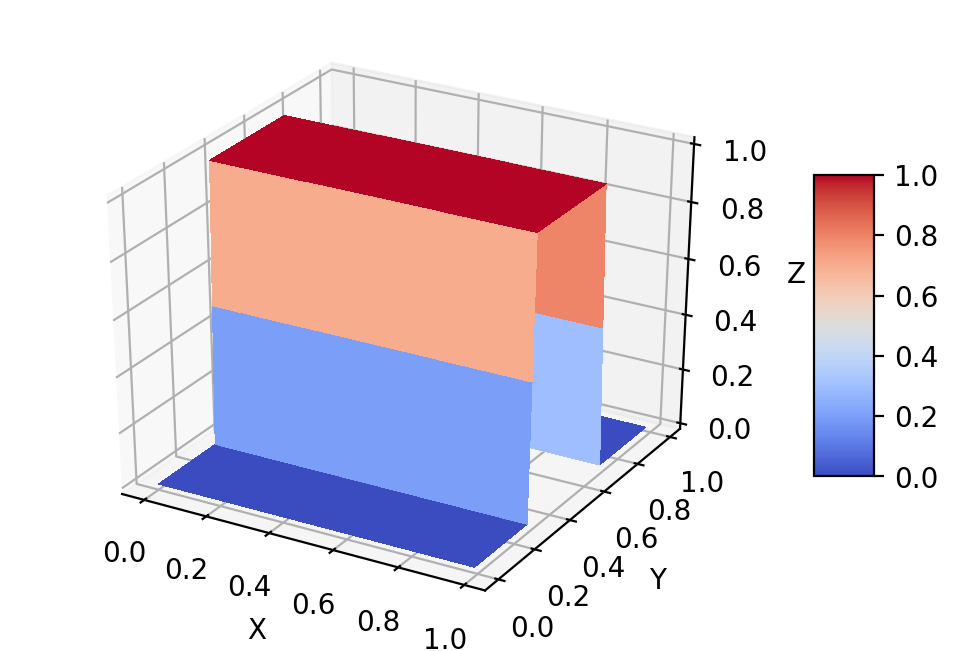

In [48]:
step = 0.01

## INPUT LAYER ##

x1 = np.matrix(np.arange(0,1,step)).T
x2 = np.matrix(np.arange(0,1,step)).T

L0 = np.hstack((x1, x2, np.ones((len(x1),1))))


## LAYER 1 ## 

w11, w12 = 1000, -1000 # Slopes
w21, w22 = 0.001, 0.001
b1, b2 = 0.3, 0.7 # Intercepts

W0 = np.array([[w11, w12], [w21, w22], [-b1*w11, -b2*w12]])

L1 = sig(np.dot(L0,W0))

print 'sig',L0.shape,'*',W0.shape,'=',L1.shape


## LAYER 2 ## 

a1, a2 = 1.0, 0.001 # Weights
b1, b2 = -1.0, 1.0 # Bias

W1 = np.array([[a1,a1],[a2,a2]]).T

L2 = np.dot(L1,W1) + [b1,b2]

print 'lin',L1.shape,'*',W1.shape,'=',L2.shape

X, Y = np.meshgrid(x1, x2)
Z = np.dot(L2[:,0], L2[:,1].T)


## PLOT IT ##

fig = plt.figure(figsize=(6,4), dpi=200)
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

sig (100, 3) * (3, 2) = (100, 2)
lin (100, 2) * (2, 2) = (100, 2)


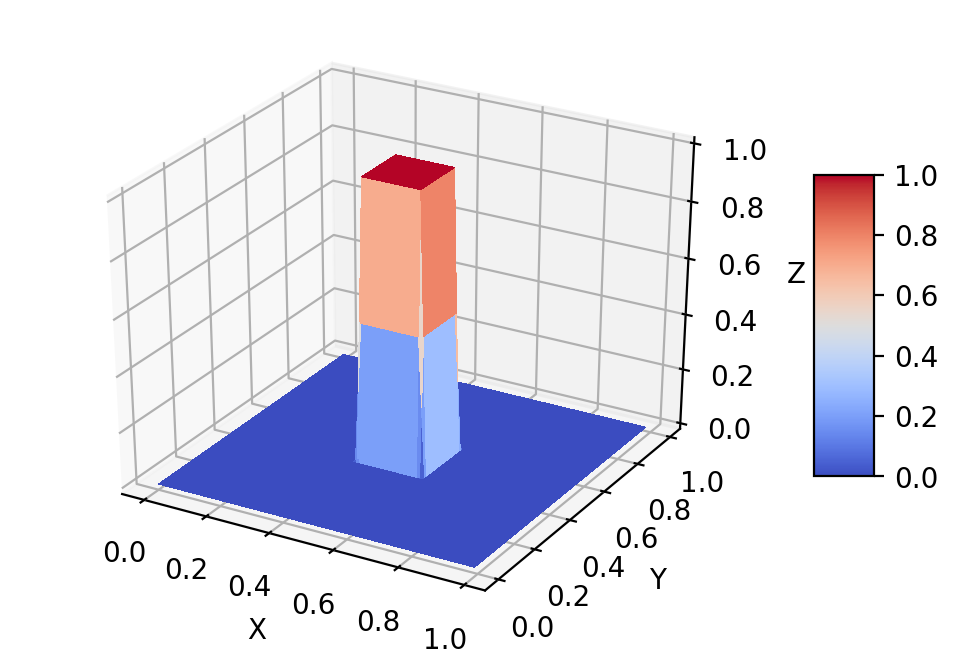

In [50]:
## INPUT LAYER ##

t = 0.01
x = np.matrix(np.arange(0,1,t)).T
y = np.matrix(np.arange(0,1,t)).T
L0 = np.hstack((x, y, np.ones((len(x),1))))


## LAYER 1 ##

w11, w12 = 1000, -1000 # Slopes
w21, w22 = 0.001, 0.001 
b1, b2 = 0.4, 0.6 # Intercepts
W0 = np.array([[w11, w12], [w21, w22], [-b1*w11, -b2*w12]])

L1 = sig(np.dot(L0,W0))

print 'sig',L0.shape,'*',W0.shape,'=',L1.shape


## LAYER 2 ##

a1, a2 = 1.0, 1.0
b1, b2 = -1, -1
W1 = np.array([[a1,a1],[a2,a2]]).T

L2 = np.dot(L1,W1) + [b1,b2]

print 'lin',L1.shape,'*',W1.shape,'=',L2.shape


## OUTPUT LAYER ##

X, Y = np.meshgrid(x, y)
Z = np.dot(L2[:,0], L2[:,1].T)


## PLOT IT ##

fig = plt.figure(figsize=(6,4), dpi=200)
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

![title](IMG_6395.jpeg)

### (C)
*Suppose you have a 2D function $f(x_1, x_2)$ defined on a unit square $(x_1, x_2 \in [0, 1])$. The maximum absolute value of the gradient for both directions is $t$. You want to approximate this function with a collection of tower functions similar to the one in part b. More specifically, we divide the unit square into a $n \times n$ grid. The towers are step functions that are centered at grid points, and each has width and depth $1/n$. You are allowed to adjust the height of each tower (this is identical incidentally to adjusting the pixels of a coarser image to represent a finer image). So we will have in total $n^2$ tower functions. And you want to make sure that the maximum error for each tower function used is $\epsilon$. What is the minimum number of tower functions that can guarantee to make such approximation for all possible function $f$ that satisfies the conditions? (Hint: think about the worst case for f.) Using the result from part b, what can you say about the relationship between the gradient limit, error bound, and the total required hidden neuron number?*

The error of any given tower greatest when the slope is $t$ along both axes $x_1$ and $x_2$. This case is illustrated below, with slopes along each axis labeled $t$.

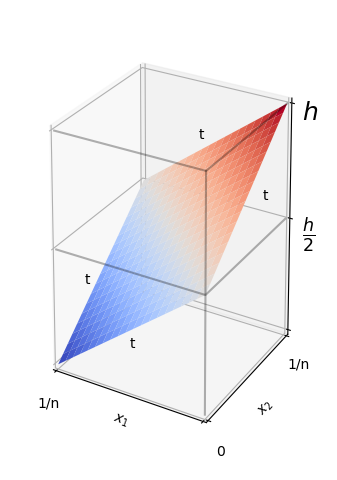

In [51]:
X, Y = np.meshgrid(np.matrix(np.linspace(0,1,20)), np.matrix(np.linspace(0,1,20)))
fig = plt.figure(figsize=(4,6), dpi=100)
ax = fig.gca(projection='3d'); ax.view_init(elev=20)
surf = ax.plot_surface(X, Y, 2*(X + Y), cmap=cm.coolwarm)
ax.plot([1,1],[0,0],[0,4], color='black', alpha=0.3)
ax.plot([0,1,1],[0,0,1],[2,2,2], color='black', alpha=0.3)
ax.plot([0,1,1],[0,0,1],[4,4,4], color='black', alpha=0.3)
ax.set_xticks([0.0,1.0]); ax.set_xticklabels(['1/n',''])
ax.set_yticks([0.0,1.0]); ax.set_yticklabels(['0','1/n'])
ax.set_zticks([0.0,2,4]); ax.set_zticklabels(['',r'$\frac{h}{2}$',r'$h$'], fontsize=18)
ax.set_xlabel(r'$x_1$', labelpad=-10); ax.set_ylabel(r'$x_2$', labelpad=-5)
ax.text(1.1,0.5, 3, 't'); ax.text(0.4, 1.0, 3, 't');
ax.text(0,0.3, 1, 't'); ax.text(0.5, 0, 0.7, 't');
ax.set_xlim([0,1]); ax.set_ylim([0,1]); ax.set_zlim([0,4])
plt.show()

The height of the rectangular prism $R$ containing the surface $S$ above is determined by the slope $t$,

$$ t = \frac{(h/2)}{(1/n)} = \frac{nh}{2} \implies h = \frac{2t}{n}$$

We can now write the volume of $R$ in terms of $n$ and $t$:

$$ V_R = \frac{h}{n^2} = \frac{2t}{n^3}$$ 

The error of the tower's estimation of the surface shown below is minimized when the peak of the tower bisects the shape, along the axis at $z = \frac{h}{2}$. In this case, the error term $\epsilon$ is bounded by the volume of the two tetrahedra $T$ bounded between $S$ and $z = \frac{h}{2}$. That is,

$$ \epsilon = 2V_T $$

The volume of each tetrahedron is exactly $V_T = \frac{V_R}{12}$ (each half of $R$ can be divided into six tetrahedra of equal size). We can now define the error in terms of $n$,

$$ \epsilon = 2\left(\frac{V_R}{12}\right) = \frac{1}{6} \left( \frac{2t}{n^3} \right) $$

Therefore, the minimum number of $n^2$ tower functions that can guarantee such an error $\epsilon$ is given by

$$ n^2 \geq \left( \frac{t}{3\epsilon} \right)^{2/3} $$

In (b) we found that a tower function can be represented by at most four hidden neurons. Thus for a given error limit $\epsilon$ the number of neurons $m$ is bounded below as $m \geq 4n^2$. Consequently,

$$ m \geq 4\left( \frac{t}{3\epsilon} \right)^{2/3} $$


## *Problem 2.* EM Algorithm

*Suppose there are two tiny laundry machines in your Duke dorm and one of
them is broken $\theta_1$ proportion of the time and the other is broken $\theta_2$
proportion of the time. Every time when a machine is broken, it simply takes your money
and does not start. Each time you put money in the machine, the probability it
will run is independent of what happened any other time you ran the machine.
You never get a choice which machine you put yours in because the other one
is always full when you go there. You went to the laundry room $m$ times this
year, and in each visit, you got to use one of laundry machine at random. You
always have way too many clothes, so you had to use whatever machine you
got that day for $n$ times to wash all your clothes. (You only brought money
for n laundry cycles so you just have to wear the dirty clothes if the machine
is broken for various cycles, hopefully no one will notice how smelly you are.)
You recorded the number of successful cycles and the number of failed cycles
(that sum to $n$). At the end of the year, your RA finally decided to report
the problem and she asked you for the probability of failure for both machines.
If you had recorded which machine you used every time, you would have had
complete information and been able to estimate $\theta_1$ and $\theta_2$ in closed form. Sadly
you were too lazy to do that, thus having to estimate these probabilities in a
harder way. Luckily you learned a possible approach to address this problem
from your favorite machine learning class—you can assign weights $w_i$ to each
laundry visit, according to how likely it is done on machine 1 or machine 2.*


### (A)
*Use EM algorithm to derive the estimation.*


The likelihood of a model $\Theta = (\theta_1,\theta_2)$ given $m \times n$ observations $X$ is given by 

$$ \mathscr{L}(\Theta \mid X) = Pr(X \mid \Theta) = \sum_Z Pr(X,Z \mid \Theta) $$

where $Z$ is a latent variable representing the machine used in each experiment.

**The Model**

Here we compute the expected value of the log likelihood. That is,


$$
\begin{align}
\log Pr(X,Z \mid \Theta)
&= \sum_{i=1}^m \log \sum_{k=1}^{2} Pr(X_i, Z_i = k \mid \Theta) \\
&= \sum_{i=1}^m \log \sum_{k=1}^{2} Pr(Z_i = k \mid \Theta)
\cdot \frac{Pr(X_i, Z_i = k \mid \Theta)}{Pr(Z_i = k \mid \Theta)} \\
& \geq \sum_{i=1}^m \sum_{k=1}^{2} Pr(Z_i = k \mid \Theta)
\cdot \log \frac{Pr(X_i, Z_i = k \mid \Theta)}{Pr(Z_i = k \mid \Theta)}
\end{align}
$$

by Jensen's inequality.

The probability that machine $k$ was used for observation $X_i$ and probabilities $\Theta$ is given by

$$ Pr(Z_i = k \mid \Theta) = \frac{Pr(X_i, Z_i = k \mid \Theta)}{Pr(X_i \mid \Theta)} $$

The likelihood of observation $X_i$ given machine $k$ is given by the binomial distribution for $k \in \{1,2\}$,

$$ Pr(X_i, Z_i = k \mid \Theta) = \frac{1}{2} \theta_k^{s_i} (1-\theta_k)^{n-s_i} $$

where $s_i$ is the number of successful washings out of $n$ attempts on the $i$th visit, and $f_i$ is the number of failed washings, such that $n = s_i + f_i$.

Lastly, the probability of an observation $X_i$ given probabilities $\Theta$, regardless of which machine was used is,

$$ Pr(X_i \mid \Theta) = \frac{1}{2} \sum_{k=1}^{2} Pr(X_i \mid Z_i = k, \Theta) $$


** E-step **

For $k \in \{1,2\}$ and $i = 1...m$, compute the following

The probability machine $k$ was used in visit $i$:

$$ Pr(Z_i = k \mid X_i, \Theta) = \frac
{Pr(X_i, Z_i = k \mid \Theta)}
{ \sum_{k=1}^{2} Pr(X_i, Z_i = k \mid \Theta) }
$$

We can now write expected number of successful washings $s_i$ or failed washings $f_i$ in visit $i$, assuming machine $k$ was used

$$ \mathbb{E}( s_i \mid X_i, \Theta) = s_i \cdot Pr(Z_i = k \mid X_i, \Theta) $$

Next, we can sum over the expectations for each trial to get expected number of expected successes $s_i$ or failures $f_i$ over the $m$ trials.

$$ \mathbb{E}(s_i \mid X, \Theta) = \sum_{i=1}^{m} \mathbb{E}( s_i \mid X_i, \Theta) $$


** M-step **

The probabilities $\theta_k \in \Theta$ for $k \in \{1,2\}$ are maximized by

$$ \theta_k = \frac
{\mathbb{E}(s_i \mid X, \Theta)}
{\mathbb{E}(s_i \mid X, \Theta) + \mathbb{E}(f_i \mid X, \Theta)}
$$

Now record the value of $Pr(X,Z \mid \Theta)$ and repeat the E-step with the maximized values of $theta_1,theta_2 \in \Theta$. Iterate until the value of $Pr(X,Z \mid \Theta)$ converges.


### (B)
*Implement the EM algorithm to estimate $\Theta$ in the language of your choice. In your data simulation, set $m = 6$, $n = 100$, $\theta_1 = 0.8, \theta_2 = 0.3$. Show the progress of your estimation.*

See python implementation below.

,Successes,Failures
0,25,75
1,74,26
2,22,78
3,76,24
4,68,32
5,63,37


Initial guess = [[0.93933038699822857, 0.50896537099678862]]


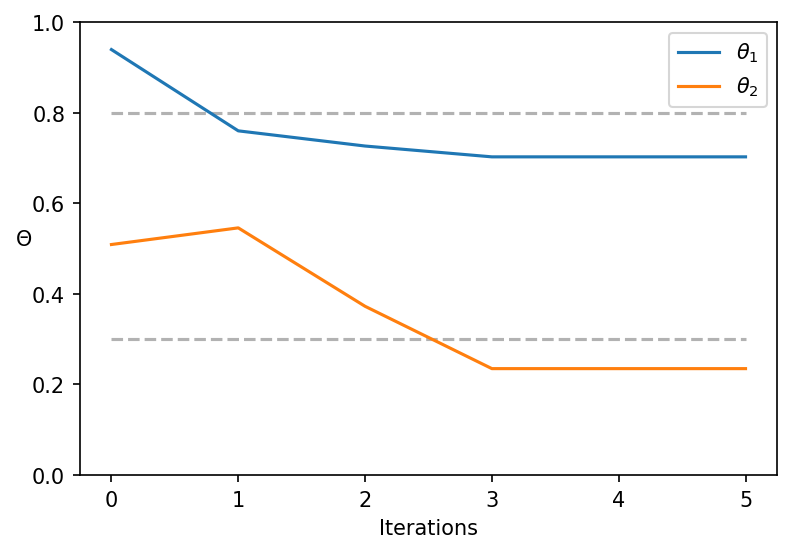

In [52]:
m, n = 6, 100
true_thetas = [0.8, 0.3]

def generate_X(theta, m, n):
    X = []
    for i in range(m):
        p = theta[ choice([0,1]) ] # Probability of failure, of machine 1 or 2
        nSuccesses = sum( choice([0,1], p=[p,1-p]) for j in range(n) )
        nFailures = n - nSuccesses
        X.append([nSuccesses, nFailures])

    return pd.DataFrame(X, columns=['Successes','Failures'])


def logLikelihood(x, p):
    nSuccesses, nFailures = x
    return nSuccesses*np.log(p) + nFailures*np.log(1.0-p)


def expectationMaximization(X, thetas, delta=10**-12):
    
    t = 0
    maxdiff = np.inf
    while maxdiff > delta:
        
        # Get thetas from previous iteration
        theta1, theta2 = thetas[-1] 

        ## E-STEP
        expectations1 = np.zeros((len(X),2))
        expectations2 = np.zeros((len(X),2))
        
        for i, x in enumerate(X.values):

            logLik1 = logLikelihood(x, theta1)
            logLik2 = logLikelihood(x, theta2)

            w1 = np.exp(logLik1) / (np.exp(logLik1) + np.exp(logLik2))
            w2 = np.exp(logLik2) / (np.exp(logLik1) + np.exp(logLik2))

            expectations1[i] = np.dot(w1,x)
            expectations2[i] = np.dot(w2,x)

            
        ## M-STEP
        new_theta1 = expectations1[:,0].sum()/expectations1.sum()
        new_theta2 = expectations2[:,0].sum()/expectations2.sum()
                
        maxdiff = np.max(np.abs([new_theta1 - theta1, new_theta2 - theta2]))
        
        thetas.append([new_theta1, new_theta2])

    return np.array(thetas)

np.random.seed(33)

# Generate training data
X = generate_X(true_thetas, m, n)
display(X)

# Guess thetas
thetas = [ list(np.random.uniform(size=2)) ]
print "Initial guess =",thetas
        
thetas = expectationMaximization(X, thetas)

fig = plt.figure(figsize=(6,4), dpi=150)
ix = range(len(thetas))
for true in true_thetas: plt.plot([0,len(ix)-1],[true,true], 'k--', alpha=0.3)
plt.plot(ix, thetas[:,0], label=r'$\theta_1$')
plt.plot(ix, thetas[:,1], label=r'$\theta_2$')
plt.xticks(ix)

plt.ylim([0,1])
plt.xlabel('Iterations'); plt.ylabel(r'$\Theta$',rotation=0)
plt.legend()

## *Problem 3.* Clustering


(443, 2)


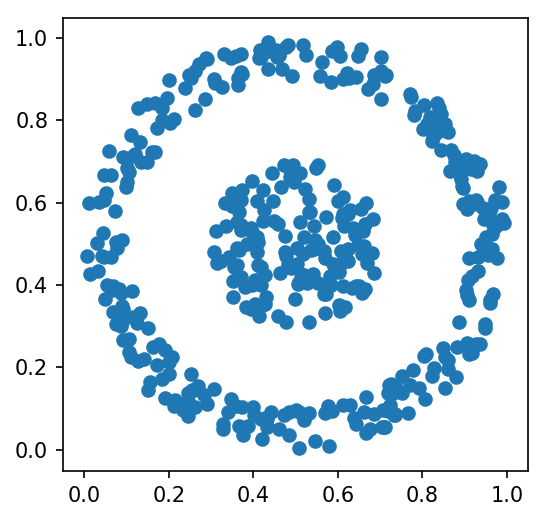

In [53]:
DATA = pd.read_csv('data.csv', sep = ',', header=None)
DATA.columns = ['x','y']
print DATA.shape

plt.figure(figsize=(4,4), dpi=150)
plt.scatter(*zip(*DATA.values))
plt.show()

### (A)
*Implement the k-means algorithm in the language of your choice. The
arguments of your function are k and the input dataset. Return both the group
assignment for each point in the dataset, as well as the mean $\mu_j$ for each group.
You can initialize each mean by randomly selecting a point from the input data.*

Convergence achieved after 12 iterations!


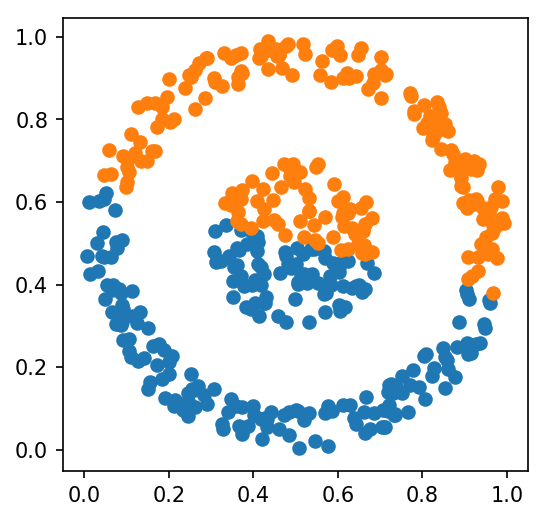

In [56]:
K = 2

data = DATA.values

def kMeans(data, k=K):
    centroids = data[choice(len(data),k,replace=False),:]
    
    n = 0
    assn = None

    while True:
        
        # Assign 
        distances = cdist(centroids, data)
        new_assn = np.argmin(distances, axis=0)
    
        # Check convergence
        if np.array_equal(new_assn, assn):
            print "Convergence achieved after {} iterations!".format(n)
            return centroids, assn

        # Update
        assn = new_assn
        centroids = [ data[assn==c,:].mean(0).tolist() for c in range(k) ]
        n += 1

        
data = DATA   
centroids, assignments = kMeans(data.values)

plt.figure(figsize=(4,4), dpi=150)
for n in set(assignments): plt.scatter(*zip(*data.values[assignments==n,:]))
plt.show()

### (B)
*Implement hierarchical agglomerative clustering algorithm in the language of your choice. The arguments of your function are k and the input dataset. Return the group assignment for each point in the dataset*

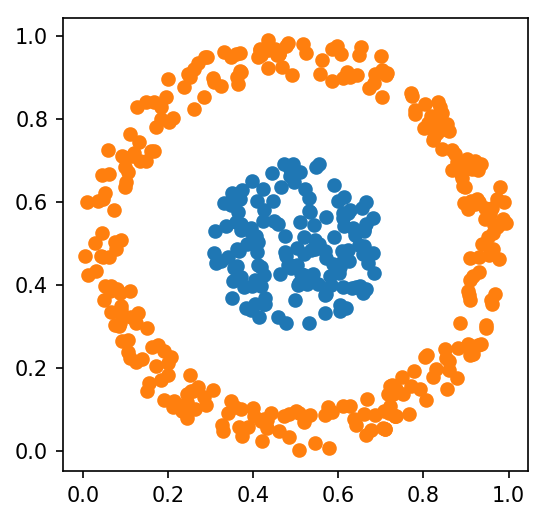

In [57]:
K = 2

def get_index(clusters):
    return [ [ int(e.strip('[ ]')) for e in c.split(',')] for c in clusters ] 

def hierarchicalAgglomerative(dist, k=K):

    # Identify clusters to merge
    ix_min = list(np.unravel_index(np.nanargmin(dist, axis=None), dist.shape))
    clusters = dist.index[ix_min].values
    
    # Create new cluster
    ix1, ix2 = get_index(clusters) 
    new_clust = str(ix1 + ix2).replace("'","")

    # Compute new distances (single linkage clustering)
    mergedist = pd.Series(dist[clusters].min(1), index=dist.index, name=new_clust)
    
    # Merge the distances of the old clusters
    dist[new_clust] = mergedist
    dist = dist.append(mergedist)
    dist = dist.drop(index=clusters, columns=clusters)

    if len(dist) == k:
        # Return clusters
        return dist.index.values
    else:
        # Recurse
        return hierarchicalAgglomerative(dist, k=K)   


# Load the data and compute distance matrix
data = DATA
elements = [ str(x) for x in range(len(data))]
dist = pd.DataFrame(squareform(pdist(data)),index=elements,columns=elements)
np.fill_diagonal(dist.values, np.nan)

# Compute clusters
clusters = hierarchicalAgglomerative(dist)

plt.figure(figsize=(4,4), dpi=150)
for ix in get_index(clusters): plt.scatter( *zip(*data.loc[ix].values))
plt.show()

### (C)
*Run your algorithms developed in part a and part b on the dataset shown
in Fig. 3, with k = 2. Which one performs better? Explain possible reasons for
this discrepancy.*

The hierarchical agglomerative clustering algorithm performs better than the k-means algorithm due to the way they compute the distance of new datapoints to a given cluster.

Because k-means relies on the centroid to identify nearby points, it requires that points in the same cluster are relatively equidistant from the mean value, and is thus unable to classify the outer ring of the sample data. In particular, the centroid of the outer ring of points is located in the middle of the central cluster, meaning that k-means will never be able to separate the outer ring from the inner cluster. 

Hierarchical agglomerative clustering is capable of classifying to test data depending on which linkage algorith is used. Here, single-linkage clustering is used, meaning that the distance between any two nodes is given by the minimum distance between any two elements in either cluster. This ensures that "chains" will form, allowing the points in the outer ring to form a cluster even though any pair of points in a given cluster may be very far apart.

### (D)
*How can you pre-process the dataset to help boost the performance of the weaker algorithm in part c?*

One could use a radial-basis kernel function to project the sample data into a higher-dimensional space in which the euclidean distance between items in the outer ring are less than the distance to the central cluster. Specifically, a radial-basis kernel function could project the central cluster of points into the z-dimension, thereby ensuring that the centroid of the points in the outer ring would be sufficiently far from the centroid of the inner cluster.